In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pais = 'Italy'

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

df = pd.read_csv(url,index_col=0)
print(df)

df = df.drop(columns=['Lat','Long'])
df = df.groupby('Country/Region').agg('sum')
print(df)

df = df.T
print(df)

DATOS = df[pais]

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

dfD = pd.read_csv(url,index_col=0)
dfD = dfD.drop(columns=['Lat','Long'])
dfD = dfD.groupby('Country/Region').agg('sum')
dfD = dfD.T
DEATHS = dfD[pais]


print(DEATHS)

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

dfR = pd.read_csv(url,index_col=0)
dfR = dfR.drop(columns=['Lat','Long'])
dfR = dfR.groupby('Country/Region').agg('sum')
dfR = dfR.T
RECOVERED = dfR[pais]
print(RECOVERED)

url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv'

dfV = pd.read_csv(url,index_col=0)
print(dfV)

dfV = dfV.T
VACCINATIONS = dfV[pais]

#print(CHILEV)

VACCINATIONS = VACCINATIONS.T
print(VACCINATIONS)


                    Country/Region        Lat  ...  7/21/21  7/22/21
Province/State                                 ...                  
NaN                    Afghanistan  33.939110  ...   142414   143183
NaN                        Albania  41.153300  ...   132763   132797
NaN                        Algeria  28.033900  ...   157005   158213
NaN                        Andorra  42.506300  ...    14379    14464
NaN                         Angola -11.202700  ...    41227    41405
...                            ...        ...  ...      ...      ...
NaN                        Vietnam  14.058324  ...    71144    78269
NaN             West Bank and Gaza  31.952200  ...   315876   315876
NaN                          Yemen  15.552727  ...     6997     7001
NaN                         Zambia -13.133897  ...   188573   189731
NaN                       Zimbabwe -19.015438  ...    91120    93421

[279 rows x 551 columns]
                    1/22/20  1/23/20  1/24/20  ...  7/20/21  7/21/21  7/22/21

In [ ]:
if pais == 'Chile':
  N = 18_950_000
elif pais == 'Germany':
  N = 83_157_000
elif pais == 'Austria':
  N = 8_292_322
elif pais == 'Czechia':
  N = 10_693_939
elif pais == 'France':
  N = 67_320_216
elif pais == 'Italy':
  N = 60_360_000
elif pais == 'Romania':
  N = 19_328_838
elif pais == 'Lithuania':
  N = 2_794_090

dfVT = VACCINATIONS['vaccine']
dfVD = VACCINATIONS['date']
dfVN = VACCINATIONS['total_vaccinations']


VV1 = [] # Pfizer Primero en aplicarse
VV2 = [] # Moderna
VV3 = [] # AstraZeneca
VV4 = [] # Johnson&Johnson 

for i in range(len(dfVT)):
  if pais == 'Chile':
    if dfVT[i] == 'Pfizer/BioNTech':
      VV1.append(dfVN[i] / N)
    elif dfVT[i] == 'Sinovac':
      VV2.append(dfVN[i] / N)
    elif dfVT[i] == 'Oxford/AstraZeneca':
      VV3.append(dfVN[i] / N)
  else:
    if dfVT[i] == 'Pfizer/BioNTech':
      VV1.append(dfVN[i] / N)
    elif dfVT[i] == 'Moderna':
      VV2.append(dfVN[i] / N)
    elif dfVT[i] == 'Oxford/AstraZeneca':
      VV3.append(dfVN[i] / N)
    elif dfVT[i] == 'Johnson&Johnson':
      VV4.append(dfVN[i] / N)    

l1 = len(VV1)
l2 = len(VV2)
l3 = len(VV3)
l4 = len(VV4)

print(l1,l2,l3,l4)


207 192 173 98


In [ ]:
#Correr si l1 != l4

if l1 != l4:

  VV1 = VV1[l1-l3:len(VV1)]
  VV2 = VV2[l2-l3:len(VV2)]

  print(l1-l2)

  Z = np.zeros(l3-l4)

  Z = list(Z)
  VV4 = Z + VV4


  print(l3-l4)

  l1 = len(VV1)
  l2 = len(VV2)
  l3 = len(VV3)
  l4 = len(VV4)

  print(l1,l2,l3,l4)

15
75
173 173 173 173


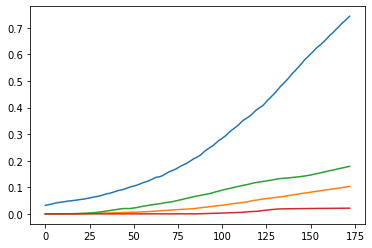

In [ ]:
plt.plot(VV1)
plt.plot(VV2)
plt.plot(VV3)
plt.plot(VV4)
plt.show()

In [ ]:
# Adecuar al país

url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/' + pais +  '.csv'


dfV = pd.read_csv(url,index_col=0)
print(dfV)
dfV = dfV.drop(columns=['source_url','vaccine','total_vaccinations'])
print(dfV)
VF = dfV['people_fully_vaccinated']
VV = dfV['people_vaccinated']
DVac = dfV['date']

                date  ... people_fully_vaccinated
location              ...                        
Italy     2020-12-27  ...                       0
Italy     2020-12-28  ...                       0
Italy     2020-12-29  ...                       0
Italy     2020-12-30  ...                       0
Italy     2020-12-31  ...                       0
...              ...  ...                     ...
Italy     2021-07-17  ...                25996098
Italy     2021-07-18  ...                26353522
Italy     2021-07-19  ...                26803247
Italy     2021-07-20  ...                27247591
Italy     2021-07-21  ...                27686217

[207 rows x 6 columns]
                date  people_vaccinated  people_fully_vaccinated
location                                                        
Italy     2020-12-27               7223                        0
Italy     2020-12-28               8658                        0
Italy     2020-12-29               9677                        0
I

In [ ]:
f = len(V1D)
#print(VV1[f-1])
#print(VV[f-1] / N)
#print(VF[f-1] / N)
print(p)
print((V1D[f-1] + V2D[f-1] + V3D[f-1] + V4D[f-1])*N)

NameError: ignored

In [ ]:
PF = []
for i in range(len(VV)):
  total = VV[i] + VF[i]
  PF.append(VV[i]/total)

V1D = []
F1D = []
V2D = []
F2D = []
V3D = []
F3D = []
V4D = []

p = PF[len(PF)-1]

if pais == 'Chile':
  for i in range(len(VV1)):
    #p = PF[i]
    V1D.append(VV1[i]*p)
    V2D.append(VV2[i]*p)
    V3D.append(VV3[i]*p)
else:
  for i in range(len(VV1)):
    #p = PF[i]
    V1D.append(VV1[i]*p)
    V2D.append(VV2[i]*p)
    V3D.append(VV3[i]*p)
    V4D.append(VV4[i])

#if pais == 'Chile':
#  V1D = VV1
#  V2D = VV2
#  V3D = VV3
#  for i in range(len(VV1)):
#    p = PF[i]
#    #V1D.append(VV1[i]*(1-p))
#    F1D.append(VV1[i]*p)
#    #V3D.append(VV3[i]*(1-p))
#    F3D.append(VV3[i]*p)
#else:
#  V1D = VV1
#  V2D = VV2
#  V3D = VV3
#  V4D = VV4
#  for i in range(len(VV1)):
#    p = PF[i]
#    #V1D.append(VV1[i]*(1-p))
#    F1D.append(VV1[i]*p)
#    #V3D.append(VV3[i]*(1-p))
#    F2D.append(VV2[i]*p)
#    F3D.append(VV3[i]*p)

In [ ]:
M = len(RECOVERED)

#S = []
I = []
R = []
D = []
T = []


for idx in range(M):
  
  r = RECOVERED[idx]
  d = DEATHS[idx]
  if idx > 0:
    i = DATOS[idx] - r -d 
  else:
    i = 0
  #print(r,d,i,v,f)
  #s = N - r -d - i -f 

  #F.append(f / N)
  #S.append(s / N)
  I.append(i / N)
  R.append(r / N)
  D.append(d / N )
  T.append(idx+1)

dos = 0

print('E(0)=',I[M-l1-dos -14])

E0 = I[M-l1 - dos -14]

#SD = S[M-l1:M-dos]
ID = I[M-l1-dos:M-dos]
RD = R[M-l1-dos:M-dos]
TD = T[M-l1-dos:M-dos] # QUITAR -2 
DD = D[M-l1-dos:M-dos]
print(len(ID),l1)

E(0)= 0.009167892644135188
173 173


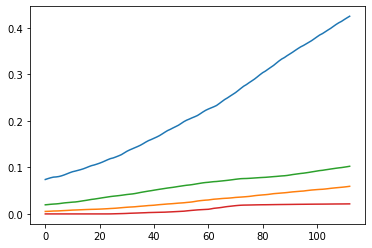

In [ ]:
plt.plot(V1D)
plt.plot(V2D)
plt.plot(V3D)
plt.plot(V4D)
#plt.plot(ID)
#plt.plot(RD)
#plt.plot(DD)
plt.show()

In [ ]:
lv = len(V1D)
print(V1D[lv-1]+V2D[lv-1] + V3D[lv-1] + V4D[lv-1])

0.5885727354902659


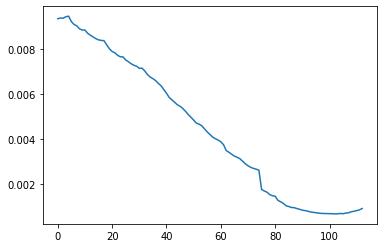

In [ ]:
plt.plot(ID)
plt.show()

In [ ]:
# No ejecutar

t0 = 60

# Alemania 125
# Italia 60
# Rumania 45
# Lituania 100
# Checa

print('E(0)=',I[t0 -14])
E0 = I[t0 -14] # 5

f10 = V1D[t0 - 21]
f20 = V2D[t0 - 21]

if t0 - 84 > 0:
  f30 = V3D[t0 - 84] 
else:
  f30 = 0

V1D = V1D[t0:l1]
F1D = F1D[t0:l1]
V2D = V2D[t0:l1]
F2D = F2D[t0:l1]
V3D = V3D[t0:l1]
F3D = F3D[t0:l1]
V4D = V4D[t0:l1]
ID  = ID[t0:l1]
RD  = RD[t0:l1]
DD  = DD[t0:l1]
TD = TD[t0:l1]

E(0)= 0.00010581510934393639


In [ ]:
print(E0,ID[0],ID[4])
E0 = ID[4]

#E0 = 0.0002192599540627969

0.00010581510934393639 0.009335304837640822 0.00944493041749503


In [ ]:
print(len(ID))

101


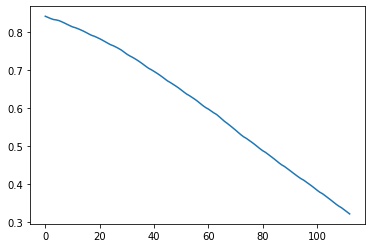

In [ ]:
SD = 1 - np.array(V1D) - np.array(V2D) - np.array(V3D) - np.array(V4D) - np.array(ID) - np.array(RD) - np.array(DD)
SD = list(SD)
plt.plot(SD)
plt.show()

Datos correctamente cargados. Procedamos a definir el modelo.


In [ ]:
from math import exp

#def rr(rr_0,rr_1,theta_rr,t):
#  if t < theta_rr:
#    return rr_0
#  else:
#    return rr_1

def rr(rr_0,rr_1,rr_2,t):
  return rr_1 /(1+exp(-rr_2*(t-rr_0))) #rr_0*exp(rr_1*t)

def rr2(rr_0,rr_1,theta_rr,t):
  if t < theta_rr:
    return 0
  else:
    return rr_0*exp(rr_1*t)


def l(l_0,l_1,t):
  return l_0*exp(l_1*t)
  #if t < theta:
  #  return l_0
  #else:
  #  return l_1

# PR = [rr_10,rr_11,rr_12,rr_20,rr_21,rr_22,rr_30,rr_31,rr_32,rr_40,rr_41,theta_rr4]
# PL = [l_1,l_2,l_3]

def fV1(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t):
  return (1-e1A)*rr(rr_10,rr_11,rr_12,t)*S - e1L1*(beta1*I + beta2*A)*V1 - l_1*V1

def fV2(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t): # Espacial
  return (1-e2A)*rr(rr_20,rr_21,rr_22,t)*S - e2L1*(beta1*I + beta2*A)*V2 - l_2*V2

def fV3(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t):
  return (1-e3A)*rr(rr_30,rr_31,rr_32,t)*S - e3L1*(beta1*I + beta2*A)*V3 - l_3*V3

def fV4(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t): # Especial
  if pais == 'Lithuania':
    return (1-e4A)*rr(rr_40,rr_41,rr_42,t)*S - e4L1*(beta1*I + beta2*A)*V4 - alpha4*V4
  else:
    return (1-e4A)*rr2(rr_40,rr_41,theta_rr,t)*S - e4L1*(beta1*I + beta2*A)*V4 - alpha4*V4

def fF1(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t):
  return l_1*V1 - alpha1*F1 - e1L2*(beta1*I + beta2*A)*F1

def fF2(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t):
  return l_2*V2 - alpha2*F2 - e2L2*(beta1*I + beta2*A)*F2

def fF3(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t):
  return l_3*V3 - alpha3*F3 - e3L2*(beta1*I + beta2*A)*F3

def fS(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t):
  ret = -(beta1*I + beta2*A)*S 
  ret += alpha1*F1 - (1-e1A)*rr(rr_10,rr_11,rr_12,t)*S
  ret += alpha2*F2 - (1-e2A)*rr(rr_20,rr_21,rr_22,t)*S
  ret += alpha3*F3 - (1-e3A)*rr(rr_30,rr_31,rr_32,t)*S
  if pais == 'Lithuania':
    ret += alpha4*V4 - (1-e4A)*rr(rr_40,rr_41,rr_42,t)*S
  else:
    ret += alpha4*V4 - (1-e4A)*rr2(rr_40,rr_41,theta_rr,t)*S
  return ret

def fE(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t):
  return (beta1*I + beta2*A)*(e1L1*V1+ e1L2*F1 + e2L1*V2 + e2L2*F2 + e3L1*V3+e3L2*F3 + e4L1*V4) + (beta1*I + beta2*A)*S - sigma*E

def fI(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t):
  return w*sigma*E - (gamma + delta)*I

def fA(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t):
  return (1-w)*sigma*E - gamma*A

def fR(V1,F1,V2,F2,V3,F3,V4,S,E,I,A,R,beta1,beta2,gamma,PR,PL,t):
  return gamma*(I + A) 

In [ ]:
# Pfizer
alpha1 = 1/180
e1L1 = 1-0.52
e1L2 = 1-0.95
e1A = 3.77e-4

# Moderna
alpha2 = 1/180
e2L1 = 1-0.8
e2L2 = 1-0.941
e2A = 7.23e-4

# AstraZeneca

alpha3 = 1/180
e3L1 = 1-0.463
e3L2 = 1-0.76
e3A = 0.00268

# Johnson&Johnson

alpha4 = 1/180
e4L1 = 1-0.663
e4A = 0.0091

sigma = 1 / 5.2
w = 0.2

In [ ]:
rr_10 = 80#825745388772445
rr_11 = 0.01 #0.027997081667968157
rr_12 = 0.002
rr_20 = 0.0001110806299061287
rr_21 = 0.02798601467439634
rr_30 = 0.00011
rr_31 = 0.029
rr_40 = 7.35205426e-06 
rr_41 = 0.037
theta_rr = 76

In [ ]:
#print(rr_10,rr_11,rr_12)
rr_10 = 40
rr_11 = 0.008
rr_12 = 0.01

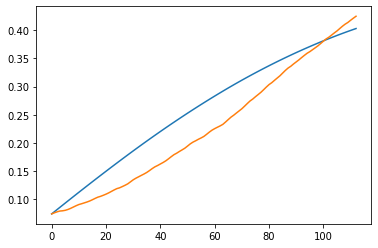

In [ ]:
# Adaptar
VnD = V1D + []
rr_0 = rr_10
rr_1 = rr_11
rr_2 = rr_12


v = VnD[0]

V = []

for t in range(len(TD)):
  s = SD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  V.append(v)
  v = v + rr(rr_0,rr_1,rr_2,t)*s
  #v = v + rr2(rr_0,rr_1,theta_rr,t)*s #0.001*exp(0.028*t)*s#rr(rr_10,rr_11,t)*s
  

plt.plot(V)
plt.plot(VnD)
plt.show()

In [ ]:
def semiLossR(rr_0,rr_1,rr_2,VD):
  V = []

  v = VD[0]
  for t in range(len(TD)):
    s = SD[t]
    V.append(v)
    v = v + rr(rr_0,rr_1,rr_2,t)*s

  V = np.array(V)
  VDnp = np.array(VD)
  return np.sum((V-VDnp)**2)

print(semiLossR(rr_0,rr_1,rr_2,VnD)) 

0.19155921312456348


In [ ]:
eta = 0.01#np.array([0.001,0.001]) 0.39468365477739376
h1 = 0.0001
#rr_0 = 0.01
#rr_1 = 0.005
#theta = 65

X = np.array([rr_0,rr_1,rr_2])
print(semiLossR(X[0],X[1],X[2],VnD))

for epocs in range(10000):
  d1 = (semiLossR(X[0] + h1,X[1],X[2],VnD) - semiLossR(X[0],X[1],X[2],VnD))/h1
  d2 = (semiLossR(X[0],X[1] + h1,X[2],VnD) - semiLossR(X[0],X[1],X[2],VnD))/h1
  d3 = (semiLossR(X[0],X[1],X[2] + h1,VnD) - semiLossR(X[0],X[1],X[2],VnD))/h1

  G = np.array([d1,d2,d3])
  #print(G)

  Xt = X - eta*G

  #print(Xt)

  if semiLossR(Xt[0],Xt[1],Xt[2],VnD) > semiLossR(X[0],X[1],X[2],VnD):
    eta = eta*0.5
  else:
    X = Xt*1

  print(semiLossR(X[0],X[1],X[2],VnD)) 

Se truncaron las últimas líneas 5000 del resultado de transmisión.
0.000989841330654315
0.0009898413305591165
0.0009898413304639615
0.0009898413303688857
0.0009898413302739419
0.0009898413301791093
0.000989841330084309
0.0009898413299896534
0.0009898413298950752
0.0009898413298005814
0.000989841329706186
0.0009898413296118588
0.0009898413295176655
0.0009898413294235308
0.0009898413293294342
0.0009898413292355403
0.000989841329141667
0.000989841329047907
0.0009898413289541547
0.0009898413288605705
0.0009898413287670771
0.000989841328673641
0.0009898413285802975
0.0009898413284870353
0.0009898413283939069
0.0009898413283008247
0.000989841328207764
0.0009898413281148515
0.0009898413280220286
0.0009898413279292237
0.0009898413278365942
0.000989841327744026
0.000989841327651498
0.0009898413275590543
0.0009898413274666922
0.0009898413273744823
0.0009898413272822514
0.0009898413271901213
0.0009898413270981686
0.0009898413270062383
0.0009898413269143543
0.0009898413268225876
0.0009898413267308

In [ ]:
# ATENCIÓN: CAMBIAR 

print(X) 
#print(semiLossR(7.99999693e+01,1.42370658e-02,2.74762877e-02,V1D))
rr_10 = X[0]
rr_11 = X[1]
rr_12 = X[2]
#print(semiLossR(rr_0,rr_1,rr_2,V1D))
print(rr_0,rr_1,rr_2)
#print(semiLossR(79.9999693,0.0142370658,0.002,V1D))

[7.99999751e+01 1.54791411e-02 2.44128543e-02]
80 0.01 0.002


0.0009898409534662331


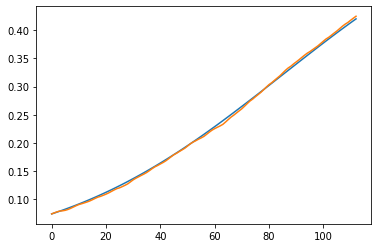

In [ ]:
# Adaptar
VnD = V1D + []
rr_0 = rr_10
rr_1 = rr_11
rr_2 = rr_12

print(semiLossR(rr_0,rr_1,rr_2,V1D))

v = VnD[0]

V = []

for t in range(len(TD)):
  s = SD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  V.append(v)
  v = v + rr(rr_0,rr_1,rr_2,t)*s
  #v = v + rr2(rr_0,rr_1,theta_rr,t)*s #0.001*exp(0.028*t)*s#rr(rr_10,rr_11,t)*s
  

plt.plot(V)
plt.plot(VnD)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


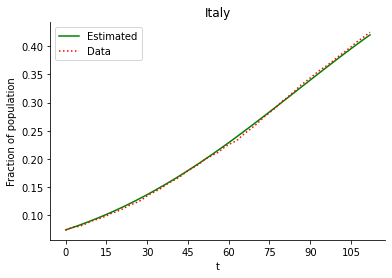

In [ ]:
from matplotlib.ticker import MaxNLocator

fig,ax = plt.subplots()

#fig = plt.figure(figsize=(9,11))
ax.plot(V,color='green')
ax.plot(VnD,color='red',linestyle=':')
ax.legend([r'Estimated',r'Data'])


ax.set_title(pais)
##ax.spines['left'].set_position(('outward',10))
##ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
#ax.xaxis.label.set_title = 't'
#ax.yaxis.label.set_title = 'Fraction of population'
#ax.set_ylim([0,1])
#ax.legend()
#ax.legend(framealpha=1)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
xticks = ax.xaxis.get_major_ticks()
#xticks[2].label1.set_visible(False)
#xticks[4].label1.set_visible(False)
#xticks[6].label1.set_visible(False)
#plt.axes.xaxis.title = 't'
ax.set_xlabel('t')
ax.set_ylabel('Fraction of population')
plt.savefig(pais + '-02.eps',bbox_inches='tight')
plt.show()

In [ ]:
rr_20 = 30
rr_21 = 0.0014
rr_22 = 0.01

In [ ]:
print(rr(rr_20,rr_21,rr_22,10000000))

5.56931239156275e-221


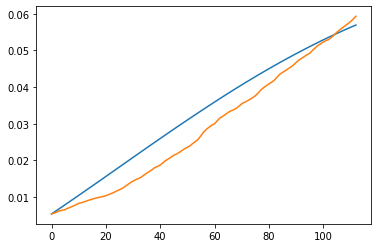

In [ ]:
# Adaptar
VnD = V2D + []
rr_0 = rr_20
rr_1 = rr_21
rr_2 = rr_22


v = VnD[0]

V = []

for t in range(len(TD)):
  s = SD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  V.append(v)
  v = v + rr(rr_0,rr_1,rr_2,t)*s
  #v = v + rr2(rr_0,rr_1,theta_rr,t)*s #0.001*exp(0.028*t)*s#rr(rr_10,rr_11,t)*s
  

plt.plot(V)
plt.plot(VnD)
plt.show()

In [ ]:
eta = np.array([0.01,0.01,10]) 
h1 = 0.0001
#rr_0 = 0.01
#rr_1 = 0.005
#theta = 65

X = np.array([rr_0,rr_1,rr_2])
print(semiLossR(X[0],X[1],X[2],VnD))

for epocs in range(10000):
  d1 = (semiLossR(X[0] + h1,X[1],X[2],VnD) - semiLossR(X[0],X[1],X[2],VnD))/h1
  d2 = (semiLossR(X[0],X[1] + h1,X[2],VnD) - semiLossR(X[0],X[1],X[2],VnD))/h1
  d3 = (semiLossR(X[0],X[1],X[2] + h1,VnD) - semiLossR(X[0],X[1],X[2],VnD))/h1

  G = np.array([d1,d2,d3])
  #print(G)

  Xt = X - eta*G

  #print(Xt)

  if semiLossR(Xt[0],Xt[1],Xt[2],VnD) > semiLossR(X[0],X[1],X[2],VnD):
    eta = eta*0.5
  else:
    X = Xt*1

  print(semiLossR(X[0],X[1],X[2],VnD)) 

Se truncaron las últimas líneas 5000 del resultado de transmisión.
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612956010188
0.00022270612

In [ ]:
print(X) 

rr_20 = X[0]
rr_21 = X[1]
rr_22 = X[2]

[2.99999998e+01 1.13928828e-03 5.52462579e-02]


0.002670307744641236


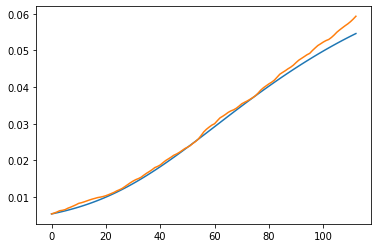

In [ ]:
# Adaptar
VnD = V2D + []

print(semiLossR(rr_0,rr_1,rr_2,VnD))

rr_0 = rr_20
rr_1 = rr_21
rr_2 = rr_22


v = VnD[0]

V = []

for t in range(len(TD)):
  s = SD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  V.append(v)
  v = v + rr(rr_0,rr_1,rr_2,t)*s
  #v = v + rr2(rr_0,rr_1,theta_rr,t)*s #0.001*exp(0.028*t)*s#rr(rr_10,rr_11,t)*s
  

plt.plot(V)
plt.plot(VnD)
plt.show()

In [ ]:
print(rr_30,rr_31)
rr_30 = 60# 0.001
rr_31 = 0.002# -0.0001
rr_32 = 0.0005

60 0.001


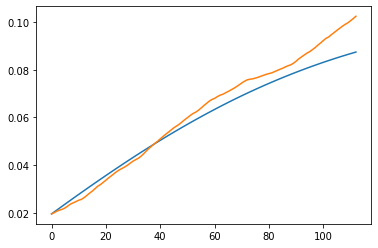

In [ ]:
# Adaptar
VnD = V3D + []
rr_0 = rr_30
rr_1 = rr_31
rr_2 = rr_32


v = VnD[0]

V = []

for t in range(len(TD)):
  s = SD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  V.append(v)
  v = v + rr(rr_0,rr_1,rr_2,t)*s
  #v = v + rr2(rr_0,rr_1,theta_rr,t)*s #0.001*exp(0.028*t)*s#rr(rr_10,rr_11,t)*s
  

plt.plot(V)
plt.plot(VnD)
plt.show()

In [ ]:
eta = np.array([0.01,0.01,10]) 
h1 = 0.0001
#rr_0 = 0.01
#rr_1 = 0.005
#theta = 65

X = np.array([rr_0,rr_1,rr_2])
print(semiLossR(X[0],X[1],X[2],VnD))

for epocs in range(10000):
  d1 = (semiLossR(X[0] + h1,X[1],X[2],VnD) - semiLossR(X[0],X[1],X[2],VnD))/h1
  d2 = (semiLossR(X[0],X[1] + h1,X[2],VnD) - semiLossR(X[0],X[1],X[2],VnD))/h1
  d3 = (semiLossR(X[0],X[1],X[2] + h1,VnD) - semiLossR(X[0],X[1],X[2],VnD))/h1

  G = np.array([d1,d2,d3])
  #print(G)

  Xt = X - eta*G

  #print(Xt)

  if semiLossR(Xt[0],Xt[1],Xt[2],VnD) > semiLossR(X[0],X[1],X[2],VnD):
    eta = eta*0.5
  else:
    X = Xt*1

  print(semiLossR(X[0],X[1],X[2],VnD)) 

Se truncaron las últimas líneas 5000 del resultado de transmisión.
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644258274372414
0.0013644

In [ ]:
print(X) 

rr_30 = X[0]
rr_31 = X[1]
rr_32 = X[2]

[ 6.00000000e+01  2.09626719e-03 -2.04910385e-03]


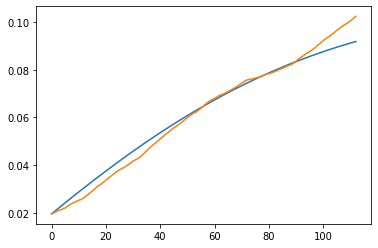

In [ ]:
# Adaptar
VnD = V3D + []
rr_0 = rr_30
rr_1 = rr_31
rr_2 = rr_32


v = VnD[0]

V = []

for t in range(len(TD)):
  s = SD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  V.append(v)
  v = v + rr(rr_0,rr_1,rr_2,t)*s
  #v = v + rr2(rr_0,rr_1,theta_rr,t)*s #0.001*exp(0.028*t)*s#rr(rr_10,rr_11,t)*s
  

plt.plot(V)
plt.plot(VnD)
plt.show()

In [ ]:
print(rr_40,rr_41)
rr_40 = 0.0001
rr_41 = 0.0001
rr_42 = 0.0001
theta_rr = 20

10 0.0001


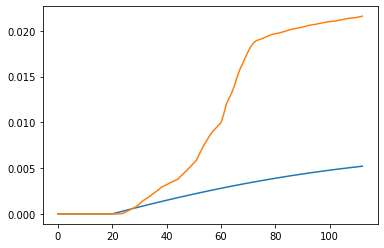

In [ ]:
# Alternativo
VnD = V4D + []
rr_0 = rr_40#50
rr_1 = rr_41#0.001
rr_2 = rr_42#0.01


v = VnD[0]

V = []

for t in range(len(TD)):
  s = SD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  V.append(v)
  if pais == 'Lithuania':
    v = v + rr(rr_0,rr_1,rr_2,t)*s
  else:
    v = v + rr2(rr_0,rr_1,theta_rr,t)*s #0.001*exp(0.028*t)*s#rr(rr_10,rr_11,t)*s
  

plt.plot(V)
plt.plot(VnD)
plt.show()

In [ ]:
eta = np.array([0.01,0.01,10]) 
h1 = 0.0001
#rr_0 = 0.01
#rr_1 = 0.005
#theta = 65

X = np.array([rr_0,rr_1,rr_2])
print(semiLossR(X[0],X[1],X[2],VnD))

for epocs in range(10000):
  d1 = (semiLossR(X[0] + h1,X[1],X[2],VnD) - semiLossR(X[0],X[1],X[2],VnD))/h1
  d2 = (semiLossR(X[0],X[1] + h1,X[2],VnD) - semiLossR(X[0],X[1],X[2],VnD))/h1
  d3 = (semiLossR(X[0],X[1],X[2] + h1,VnD) - semiLossR(X[0],X[1],X[2],VnD))/h1

  G = np.array([d1,d2,d3])
  #print(G)

  Xt = X - eta*G

  #print(Xt)

  if semiLossR(Xt[0],Xt[1],Xt[2],VnD) > semiLossR(X[0],X[1],X[2],VnD):
    eta = eta*0.5
  else:
    X = Xt*1

  print(semiLossR(X[0],X[1],X[2],VnD)) 

Se truncaron las últimas líneas 5000 del resultado de transmisión.
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.001457718664104903
0.0014577

In [ ]:
print(X) 

rr_40 = X[0]
rr_41 = X[1]
rr_42 = X[2]

[ 5.00000000e+01  2.23673820e-03 -5.81791482e-03]


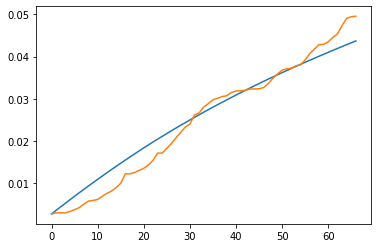

In [ ]:
# Alternativo
VnD = V4D + []
rr_0 = rr_40
rr_1 = rr_41
rr_2 = rr_42


v = VnD[0]

V = []

for t in range(len(TD)):
  s = SD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  V.append(v)
  v = v + rr(rr_0,rr_1,rr_2,t)*s
  #v = v + rr2(rr_0,rr_1,theta_rr,t)*s #0.001*exp(0.028*t)*s#rr(rr_10,rr_11,t)*s
  

plt.plot(V)
plt.plot(VnD)
plt.show()

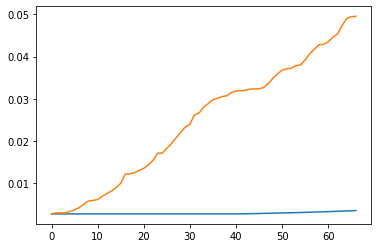

In [ ]:
# Adaptar
VnD = V4D + []
theta_rr = 40
rr_0 = rr_40
rr_1 = rr_41 + 0.005

v = VnD[0]

V = []

for t in range(len(TD)):
  s = SD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  V.append(v)
  #v = v + rr(rr_0,rr_1,t)*s
  v = v + rr2(rr_0,rr_1,theta_rr,t)*s #0.001*exp(0.028*t)*s#rr(rr_10,rr_11,t)*s
  

plt.plot(V)
plt.plot(VnD)
plt.show()

In [ ]:
def semiLossR2(rr_0,rr_1,VD):
  V = []

  v = VD[0]
  for t in range(len(TD)):
    s = SD[t]
    V.append(v)
    v = v + rr2(rr_0,rr_1,theta_rr,t)*s

  V = np.array(V)
  VDnp = np.array(VD)
  return np.sum((V-VDnp)**2)

print(semiLossR2(rr_0,rr_1,VnD)) 

0.012481886303893892


In [ ]:
eta = np.array([0.001,1]) 
h1 = 0.0001


X = np.array([rr_0,rr_1])
print(semiLossR2(X[0],X[1],VnD))

for epocs in range(10000):
  d1 = (semiLossR2(X[0] + h1,X[1],VnD) - semiLossR2(X[0],X[1],VnD))/h1
  d2 = (semiLossR2(X[0],X[1] + h1,VnD) - semiLossR2(X[0],X[1],VnD))/h1
  #d3 = (semiLossR2(X[0],X[1] + h1,X[2],VnD) - semiLossR2(X[0],X[1],X[2],VnD))/h1

  G = np.array([d1,d2])
  #print(G)

  Xt = X - eta*G

  #print(Xt)

  if semiLossR2(Xt[0],Xt[1],VnD) > semiLossR2(X[0],X[1],VnD):
    eta = eta*0.5
  else:
    X = Xt*1

  print(semiLossR2(X[0],X[1],VnD)) 

Se truncaron las últimas líneas 5000 del resultado de transmisión.
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.000623717584307519
0.0006237

In [ ]:
# ATENCIÓN: CAMBIAR 

print(X) 

rr_40 = X[0]
rr_41 = X[1]

[ 4.11732992e-04 -7.27884856e-05]


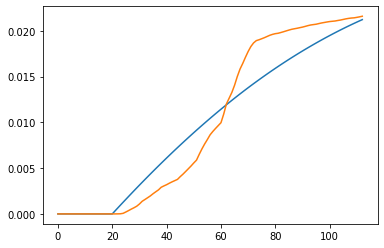

In [ ]:
VnD = V4D + []
rr_0 = rr_40
rr_1 = rr_41

v = VnD[0]

V = []

for t in range(len(TD)):
  s = SD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  V.append(v)
  #v = v + rr(rr_0,rr_1,t)*s
  v = v + rr2(rr_0,rr_1,theta_rr,t)*s #0.001*exp(0.028*t)*s#rr(rr_10,rr_11,t)*s
  

plt.plot(V)
plt.plot(VnD)
plt.show()

In [ ]:
print("Parámetros")
print(rr_10,rr_11,rr_12)
print(rr_20,rr_21,rr_22)
print(rr_30,rr_31,rr_32)
print(rr_40,rr_41,rr_42,theta_rr)

Parámetros
79.99997508832861 0.015479141083501655 0.024412854339046584
29.99999975468751 0.0011392882785527267 0.05524625790212244
59.99999999973497 0.0020962671859731555 -0.0020491038459082758
0.00041173299245796764 -7.278848564993603e-05 0.0001 20


In [ ]:
rr_10,rr_11,rr_12 = 40,0.00847637119286932,-0.004782760764694416
rr_20,rr_21,rr_22 = 30,0.0011306344983919156,-0.01887777938784596
rr_30,rr_31,rr_32 = 30,0.0022517765862055577,0.009902887836412536
rr_40,rr_41,rr_42 = 40,0.002236738200264044,-0.005817914824960355

In [ ]:
#print(beta1,beta2,gamma,delta)
gamma,delta = 0.04801894653636193,0.0004826603192670972

In [ ]:
l_1 = 1/21.
l_2 = 1/21.
l_3 = 1/84.
l_4 = 1
#l_10 = 0.020976392282470828
#l_11 = 0.01
#l_20 = 0.03935843611278154
#l_21 = -0.011290054746508054
#l_30 = 0.04920008749254581 
#l_31 = -0.015578358129969078

In [ ]:
# NO EJECUTAR LAS CELDAS

l_0 = l_10
l_1 = l_11
FnD = F1D + []
VnD = V1D + []

def semiLossL(l_0,l_1,VD,FD):
  F = []

  f = FD[0]
  for t in range(len(TD)):
    v = VD[t] - FD[t]
    F.append(f)
    f = f + l(l_0,l_1,t)*v

  F = np.array(F)
  FDnp = np.array(FD)
  return np.sum((F-FDnp)**2)

print(semiLossL(l_0,l_1,VnD,FnD))

NameError: ignored

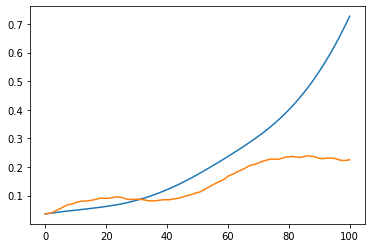

In [ ]:
f = FnD[0]
F = []

for t in range(len(TD)):
  #print(s,1 - v - RD[t] - ID[t])
  v = VnD[t] - FnD[t]
  F.append(f)
  f = f + l(l_0,l_1,t)*v #0.001*exp(0.028*t)*s#rr(rr_10,rr_11,t)*s
  
plt.plot(F)
plt.plot(FnD)
plt.show()

In [ ]:
eta = 0.1#np.array([0.01,0.1])
h1 = 0.0001
#rr_0 = 0.01
#rr_1 = 0.005
#theta = 65

X = np.array([l_0,l_1])
print(semiLossL(X[0],X[1],VnD,FnD))

for epocs in range(10000):
  d1 = (semiLossL(X[0] + h1,X[1],VnD,FnD) - semiLossL(X[0],X[1],VnD,FnD))/h1
  d2 = (semiLossL(X[0],X[1] + h1,VnD,FnD) - semiLossL(X[0],X[1],VnD,FnD))/h1

  G = np.array([d1,d2])
  #print(G)

  Xt = X - eta*G

  if semiLossL(Xt[0],Xt[1],VnD,FnD) > semiLossL(X[0],X[1],VnD,FnD):
    eta = eta*0.5
  else:
    X = Xt*1

  print(semiLossL(X[0],X[1],VnD,FnD))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.043926923879763595
0.0439269

In [ ]:
# Atención
print(X) 
l_10 = X[0]
l_11 = X[1]

[ 0.03528135 -0.01653845]


In [ ]:
l_0 = l_10
l_1 = l_11
FnD = F1D + []
VnD = V1D + []


print(semiLossL(l_0,l_1,VnD,FnD))

0.043926923879763595


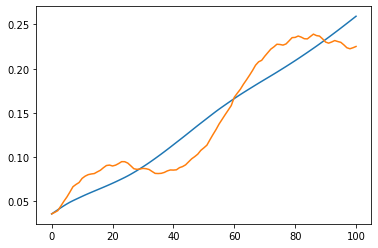

In [ ]:
f = FnD[0]
F = []

for t in range(len(TD)):
  #print(s,1 - v - RD[t] - ID[t])
  v = VnD[t] - FnD[t]
  F.append(f)
  f = f + l(l_0,l_1,t)*v #0.001*exp(0.028*t)*s#rr(rr_10,rr_11,t)*s
  
plt.plot(F)
plt.plot(FnD)
plt.show()

In [ ]:
l_0 = l_20
l_1 = l_21
FnD = F2D + []
VnD = V2D + []

print(semiLossL(l_0,l_1,VnD,FnD))

0.0066092134826558485


In [ ]:
eta = 0.1#np.array([0.01,0.1])
h1 = 0.0001
#rr_0 = 0.01
#rr_1 = 0.005
#theta = 65

X = np.array([l_0,l_1])
print(semiLossL(X[0],X[1],VnD,FnD))

for epocs in range(10000):
  d1 = (semiLossL(X[0] + h1,X[1],VnD,FnD) - semiLossL(X[0],X[1],VnD,FnD))/h1
  d2 = (semiLossL(X[0],X[1] + h1,VnD,FnD) - semiLossL(X[0],X[1],VnD,FnD))/h1

  G = np.array([d1,d2])
  #print(G)

  Xt = X - eta*G

  if semiLossL(Xt[0],Xt[1],VnD,FnD) > semiLossL(X[0],X[1],VnD,FnD):
    eta = eta*0.5
  else:
    X = Xt*1

  print(semiLossL(X[0],X[1],VnD,FnD))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982792524560454
0.0006982

In [ ]:
# Atención
print(X) 
l_20 = X[0]
l_21 = X[1]

[ 0.04317516 -0.02464175]


0.0006982792524560454


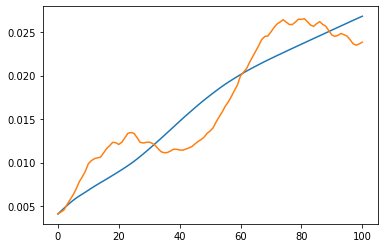

In [ ]:
l_0 = l_20
l_1 = l_21
FnD = F2D + []
VnD = V2D + []

print(semiLossL(l_0,l_1,VnD,FnD))

f = FnD[0]
F = []

for t in range(len(TD)):
  #print(s,1 - v - RD[t] - ID[t])
  v = VnD[t] - FnD[t]
  F.append(f)
  f = f + l(l_0,l_1,t)*v #0.001*exp(0.028*t)*s#rr(rr_10,rr_11,t)*s
  
plt.plot(F)
plt.plot(FnD)
plt.show()

In [ ]:
l_0 = l_30
l_1 = l_31
FnD = F3D + []
VnD = V3D + []


print(semiLossL(l_0,l_1,VnD,FnD))

0.017967876315078478


In [ ]:
eta = 0.1#np.array([0.01,0.1])
h1 = 0.0001
#rr_0 = 0.01
#rr_1 = 0.005
#theta = 65

X = np.array([l_0,l_1])
print(semiLossL(X[0],X[1],VnD,FnD))

for epocs in range(10000):
  d1 = (semiLossL(X[0] + h1,X[1],VnD,FnD) - semiLossL(X[0],X[1],VnD,FnD))/h1
  d2 = (semiLossL(X[0],X[1] + h1,VnD,FnD) - semiLossL(X[0],X[1],VnD,FnD))/h1

  G = np.array([d1,d2])
  #print(G)

  Xt = X - eta*G

  if semiLossL(Xt[0],Xt[1],VnD,FnD) > semiLossL(X[0],X[1],VnD,FnD):
    eta = eta*0.5
  else:
    X = Xt*1

  print(semiLossL(X[0],X[1],VnD,FnD))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104314742343557
0.0009104

In [ ]:
# Atención
print(X) 
l_30 = X[0]
l_31 = X[1]

[ 0.03343978 -0.02308007]


0.0009104314742343557


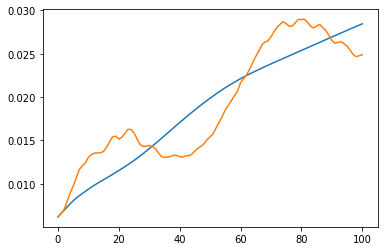

In [ ]:
l_0 = l_30
l_1 = l_31
FnD = F3D + []
VnD = V3D + []

f = FnD[0]
F = []


print(semiLossL(l_0,l_1,VnD,FnD))

for t in range(len(TD)):
  #print(s,1 - v - RD[t] - ID[t])
  v = VnD[t] - FnD[t]
  F.append(f)
  f = f + l(l_0,l_1,t)*v #0.001*exp(0.028*t)*s#rr(rr_10,rr_11,t)*s
  
plt.plot(F)
plt.plot(FnD)
plt.show()

In [ ]:
# Parámetros
print(l_10,l_11)
print(l_20,l_21)
print(l_30,l_31)

0.03528134930554406 -0.016538445951890593
0.04317516315945367 -0.024641751842706672
0.03343978221746903 -0.023080067842310956


In [ ]:
delta = 0.01

def semiLossD(delta):
  d = DD[0]

  D = []

  for t in range(len(TD)):
    i = ID[t] 
    D.append(d)
    d = d + delta*i#v

  D = np.array(D)
  DDnp = np.array(DD)
  return np.sum((D-DDnp)**2)

print(semiLossD(delta))  

0.0014078903873196227


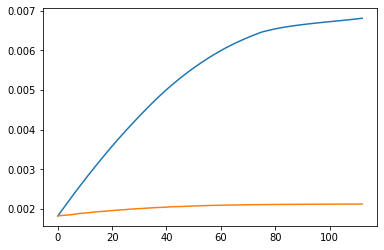

In [ ]:
d = DD[0]

D = []

for t in range(len(TD)):
  i = ID[t] #- FD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  D.append(d)
  d = d + delta*i#v
  
plt.plot(D)
plt.plot(DD)
#plt.plot(ID)
plt.show()

In [ ]:
eta = 0.1
h1 = 0.0001


for epocs in range(10000):
  d = semiLossD(delta + h1) - semiLossD(delta)
  d = d / h1

  #print(G)

  deltat = delta - eta*d

  if semiLossD(deltat) > semiLossD(delta):
    eta = eta*0.8
  else:
    delta = deltat*1


  print(semiLossD(delta))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.584326107165259e-08
3.5843261

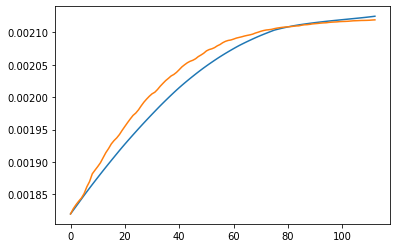

In [ ]:
d = DD[0]

D = []

for t in range(len(TD)):
  i = ID[t] #- FD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  D.append(d)
  d = d + delta*i#v
  
plt.plot(D)
plt.plot(DD)
#plt.plot(ID)
plt.show()

In [ ]:
print(delta)

0.0006108321639378059


In [ ]:
gamma = 0.1 

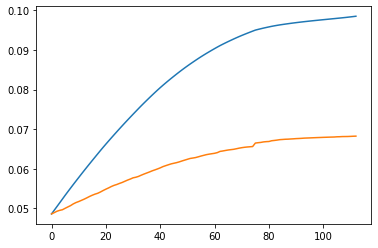

In [ ]:
rc = RD[0]

RC = []

for t in range(len(TD)):
  i = ID[t] #- FD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  RC.append(rc)
  rc = rc + gamma*i#v
  
plt.plot(RC)
plt.plot(RD)
#plt.plot(ID)
plt.show()

In [ ]:
def semiLossG(gamma):
  rc = RD[0]

  RC = []

  for t in range(len(TD)):
    i = ID[t] 
    RC.append(rc)
    rc = rc + gamma*i#v

  RC = np.array(RC)
  RDnp = np.array(RD)
  return np.sum((RC-RDnp)**2)

print(semiLossG(gamma))

0.06149925764249526


In [ ]:
eta = 0.1
h1 = 0.0001


for epocs in range(10000):
  d = semiLossG(gamma + h1) - semiLossG(gamma)
  d = d / h1

  #print(G)

  gammat = gamma - eta*d

  if semiLossG(gammat) > semiLossG(gamma):
    eta = eta*0.8
  else:
    gamma = gammat*1


  print(semiLossG(gamma))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.9296550844440728e-05
2.92965508444

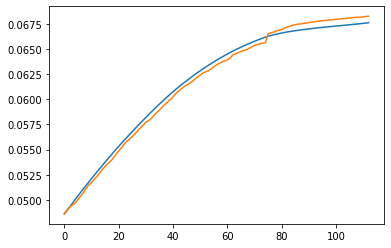

In [ ]:
rc = RD[0]

RC = []

for t in range(len(TD)):
  i = ID[t] #- FD[t] #1 - v - RD[t] - ID[t]
  #print(s,1 - v - RD[t] - ID[t])
  RC.append(rc)
  rc = rc + gamma*i#v
  
plt.plot(RC)
plt.plot(RD)
#plt.plot(ID)
plt.show()

In [ ]:
def pos(X): 
  sum = 0
  for x in X:
    if x < 0:
      sum += abs(x)
  return sum

def pos2(x):
  if x < 0:
    return abs(x)
  else:
    return 0

In [ ]:
def Loss(beta1,beta2,w):
  m = 1
  h1 = 1 / m

  v1 = V1D[0] 
  v1c = V1D[0]
  f1 = F1D[0]
  f1c = F1D[0]
  v2 = V2D[0] 
  v2c = V2D[0]
  f2 = F2D[0]
  f2c = F2D[0]
  v3 = V3D[0] 
  v3c = V3D[0]
  f3 = F3D[0]
  f3c = F3D[0]
  v4 = V4D[0]
  v4c = V4D[0]
  #s = SD[0]
  e = E0
  i = ID[0]
  a = (1-w)*ID[0]
  r = RD[0]
  rc = RD[0]  
  d = DD[0]
  s = SD[0]#1 - v1 - f1 - v2 - f2 - v3 - f3 - v4 - e - i - a - r - d 

  #print(s)

  V1 = [v1]
  V1C = [v1c]
  F1 = [f1]
  F1C = [f1c]
  V2 = [v2]
  V2C = [v2c]
  F2 = [f2]
  F2C = [f2c]
  V3 = [v3]
  V3C = [v3c]
  F3 = [f3]
  F3C = [f3c]
  V4 = [v4]
  V4C = [v4c]


  S = [s]
  E = [e]
  I = [i]
  A = [a]
  R = [r]
  RC= [r]
  D = [d]

  PR = [rr_10,rr_11,rr_20,rr_21,rr_30,rr_31,rr_40,rr_41,theta_rr]
  PL = [l_10,l_11,l_20,l_21,l_30,l_31,w]



  for tempo in range(1,len(TD)*m): #10000

    t = tempo / m

    #print(v1+v2+s+e+i+a+h+u+r+d)
    v11 = v1 + h1*fV1(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v1c1= v1c + h1*rr(rr_10,rr_11,t)*s
    f11 = f1 + h1*fF1(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    f1c1= f1c + l(l_10,l_11,t)*(v1c1-f1c)#v
    v21 = v2 + h1*fV2(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v2c1= v2c + h1*rr(rr_20,rr_21,t)*s
    f21 = f2 + h1*fF2(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    f2c1= f2c + l(l_20,l_21,t)*(v2c1-f2c)#v
    v31 = v3 + h1*fV3(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v3c1= v3c + h1*rr(rr_30,rr_31,t)*s
    f31 = f3 + h1*fF3(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    f3c1= f3c + l(l_30,l_31,t)*(v3c1-f3c)#v
    v41 = v4 + h1*fV4(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v4c1= v4c + h1*rr2(rr_40,rr_41,theta_rr,t)*s
    s1 = s + h1*fS(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    e1 = e + h1*fE(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    i1 = i + h1*fI(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    a1 = a + h1*fA(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    r11 = r + h1*fR(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    rc1= rc + h1*gamma*i
    d1 = d + h1*delta*i


    v1 = v11 + 0
    v1c = v1c1 + 0
    f1c = f1c1 + 0
    f1 = f11 + 0
    v2 = v21 + 0
    v2c = v2c1 + 0  
    f2 = f21 + 0
    f2c = f2c1 + 0
    v3 = v31 + 0
    v3c = v3c1 + 0
    f3c = f3c1 + 0
    f3 = f31 + 0  
    v4 = v41 + 0
    v4c = v4c1 + 0
    s = s1 + 0
    e = e1 + 0
    i = i1 + 0
    a = a1 + 0
    r = r11 + 0
    rc = rc1 + 0
    d = d1 + 0

    V1.append(v1)
    V1C.append(v1c)
    F1.append(f1)
    F1C.append(f1c)
    V2.append(v2)
    V2C.append(v2c)
    F2.append(f2)
    F2C.append(f2c)
    V3.append(v3)
    V3C.append(v3c)
    F3.append(f3)
    F3C.append(f3c)
    V4.append(v4)
    V4C.append(v4c)
    S.append(s)
    E.append(e)
    I.append(i)
    A.append(a)
    R.append(r)
    RC.append(rc)
    D.append(d)


  I = np.array(I)
  R = np.array(R)
  RC = np.array(RC)
  V1C = np.array(V1C)
  F1C = np.array(F1C)
  V2C = np.array(V2C)
  F2C = np.array(F2C)
  V3C = np.array(V3C)
  F3C = np.array(F3C)
  V4C = np.array(V4C)

  IDnp = np.array(ID)
  RDnp = np.array(RD)
  V1Dnp = np.array(V1D)
  F1Dnp = np.array(F1D)
  V2Dnp = np.array(V2D)
  F2Dnp = np.array(F2D)
  V3Dnp = np.array(V3D)
  F3Dnp = np.array(F3D)
  V4Dnp = np.array(V4D)

  SDnp = np.array(SD)

  suma = (I-IDnp)**2 + (RC - RDnp)**2 + 0.5*(S - SDnp)**2
  suma = np.sum(suma) 
  suma = suma + pos2(beta2) + pos2(beta1) + pos2(w)
  #suma += pos(V4)
  #suma += pos(V1) + pos(V2) + pos(V3) + pos(F1) + pos(F3) + pos(S) + pos(E) + pos(I) + pos(A) + pos(R) + pos(D)
  return suma

In [ ]:
fino = True

def Loss(beta1,beta2,w):
  m = 1
  h1 = 1 / m

  v1 = V1D[0] 
  v1c = V1D[0]
  f1 = f10
  #f1c = F1D[0]
  v2 = V2D[0] 
  v2c = V2D[0]
  f2 = f20
  #f2c = F2D[0]
  v3 = V3D[0] 
  v3c = V3D[0]
  f3 = f30#F3D[0]
  #f3c = F3D[0]
  v4 = V4D[0]
  v4c = V4D[0]
  #s = SD[0]
  e = E0
  i = ID[0]
  a = (1-w)*ID[0] / w
  r = RD[0]
  rc = RD[0]  
  d = DD[0]
  s = SD[0]#1 - v1 - f1 - v2 - f2 - v3 - f3 - v4 - e - i - a - r - d 

  #print(s)

  if pais == 'Lithuania' and fino:
    v1,v1c,f1,v2,v2c,f2,v3,f3,v4,v4c,s,e,i,a,r,d = v1p+0,v1cp+0,f1p+0,v2p+0,v2cp+0,f2p+0,v3p+0,f3p+0,v4p+0,v4cp+0,sp+0,ep+0,ip+0,ap+0,rp+0,dp+0 

  V1 = [v1]
  V1C = [v1c]
  F1 = [f1]
  #F1C = [f1c]
  V2 = [v2]
  V2C = [v2c]
  F2 = [f2]
  #F2C = [f2c]
  V3 = [v3]
  V3C = [v3c]
  F3 = [f3]
  #F3C = [f3c]
  V4 = [v4]
  V4C = [v4c]


  S = [s]
  E = [e]
  I = [i]
  A = [a]
  R = [r]
  RC= [r]
  D = [d]

  PR = [rr_10,rr_11,rr_12,rr_20,rr_21,rr_22,rr_30,rr_31,rr_32,rr_40,rr_41,theta_rr4]
  PL = [l_1,l_2,l_3]

  if fino:

    inicial = 0 #45
    final = 75 #45#len(TD)
  else: 
    inicial = 1
    final = len(TD)

  for tempo in range(inicial,final):#len(TD)*m): #10000

    t = tempo / m

    d1 = fV1(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d2 = fF1(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d3 = fV2(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d4 = fF2(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d5 = fV3(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d6 = fF3(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d7 = fV4(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d8 = fS(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d9 = fE(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d10= fI(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d11= fA(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d12 = fR(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d13 = delta*i

    #print(d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13)
    #print(d1+d2+d3+d4+d5+d6+d7+d8+d9+d10+d11+d12+d13)

    v11 = v1 + h1*fV1(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v1c1= v1c + h1*rr(rr_10,rr_11,rr_12,t)*s
    f11 = f1 + h1*fF1(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    #f1c1= f1c + l(l_10,l_11,t)*(v1c1-f1c)#v
    v21 = v2 + h1*fV2(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v2c1= v2c + h1*rr(rr_20,rr_21,rr_22,t)*s
    f21 = f2 + h1*fF2(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    #f2c1= f2c + l(l_20,l_21,t)*(v2c1-f2c)#v
    v31 = v3 + h1*fV3(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v3c1= v3c + h1*rr(rr_30,rr_31,rr_32,t)*s
    f31 = f3 + h1*fF3(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    #f3c1= f3c + l(l_30,l_31,t)*(v3c1-f3c)#v
    v41 = v4 + h1*fV4(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    if pais == 'Lithuania':
      v4c1= v4c + h1*rr(rr_40,rr_41,rr_42,t)*s
    else:
      v4c1= v4c + h1*rr2(rr_40,rr_41,theta_rr,t)*s
    s1 = s + h1*fS(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    e1 = e + h1*fE(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    i1 = i + h1*fI(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    a1 = a + h1*fA(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    r11 = r + h1*fR(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    rc1= rc + h1*gamma*i
    d1 = d + h1*delta*i

    v1 = v11 + 0
    v1c = v1c1 + 0
    #f1c = f1c1 + 0
    f1 = f11 + 0
    v2 = v21 + 0
    v2c = v2c1 + 0  
    f2 = f21 + 0
    #f2c = f2c1 + 0
    v3 = v31 + 0
    v3c = v3c1 + 0
    #f3c = f3c1 + 0
    f3 = f31 + 0  
    v4 = v41 + 0
    v4c = v4c1 + 0
    s = s1 + 0
    e = e1 + 0
    i = i1 + 0
    a = a1 + 0
    r = r11 + 0
    rc = rc1 + 0
    d = d1 + 0

    V1.append(v1)
    V1C.append(v1c)
    F1.append(f1)
    #F1C.append(f1c)
    V2.append(v2)
    V2C.append(v2c)
    F2.append(f2)
    #F2C.append(f2c)
    V3.append(v3)
    V3C.append(v3c)
    F3.append(f3)
    #F3C.append(f3c)
    V4.append(v4)
    V4C.append(v4c)
    S.append(s)
    E.append(e)
    I.append(i)
    A.append(a)#w2*i) # !
    R.append(r)
    RC.append(rc)
    D.append(d)


  I = np.array(I)
  R = np.array(R)
  RC = np.array(RC)
  V1C = np.array(V1C)
  #F1C = np.array(F1C)
  V2C = np.array(V2C)
  #F2C = np.array(F2C)
  V3C = np.array(V3C)
  #F3C = np.array(F3C)
  V4C = np.array(V4C)

  IDnp = np.array(ID)
  RDnp = np.array(RD)
  V1Dnp = np.array(V1D)
  #F1Dnp = np.array(F1D)
  V2Dnp = np.array(V2D)
  #F2Dnp = np.array(F2D)
  V3Dnp = np.array(V3D)
  #F3Dnp = np.array(F3D)
  V4Dnp = np.array(V4D)

  SDnp = np.array(SD)

  #inicial = inicial -1
  if fino:
    if inicial == 0:
      final = final + 1
    else: 
      inicial = inicial -1

    IDnp = IDnp[inicial:final]
    RDnp = RDnp[inicial:final]
    V1Dnp = V1Dnp[inicial:final]
    V2Dnp = V2Dnp[inicial:final]
    V3Dnp = V3Dnp[inicial:final]
    V4Dnp = V4Dnp[inicial:final]


  #print(len(IDnp))

  suma = 10*(I-IDnp)**2 + (RC - RDnp)**2 + (V1C-V1Dnp)**2 + (V2C-V2Dnp)**2 + (V3C-V3Dnp)**2 + (V4C-V4Dnp)**2 #0.1*(S - SDnp)**2
  suma = np.sum(suma) 
  suma = suma + pos2(beta2) + pos2(beta1) + pos2(w)
  #suma += pos(V4)
  #suma += pos(V1) + pos(V2) + pos(V3) + pos(F1) + pos(F3) + pos(S) + pos(E) + pos(I) + pos(A) + pos(R) + pos(D)
  return suma

In [ ]:
import random

theta_rr4 = theta_rr

beta1 = random.random()# beta11#0.1
beta2 = random.random()#beta12#0.1
w = 0.25 #random.random()
#gamma = random.random()
L = Loss(beta1,beta2,w)
print(L)

11.312663633866553


In [ ]:
print(len(ID))

67


In [ ]:
L = Loss(beta1,beta2,w)
print(L) #0.021814013249721306

0.002083441543422695


In [ ]:
PR = [rr_10,rr_11,rr_12,rr_20,rr_21,rr_22,rr_30,rr_31,rr_32,rr_40,rr_41,theta_rr4]
PL = [l_1,l_2,l_3]

X = np.array([beta1,beta2])

eta = 0.01

print(len(X))

2


In [ ]:
rol = 0

for epocs in range(10000):

  Ls = Loss(X[0],X[1],X[2])
  print(Ls)

  d1 = (Loss(X[0] + h1,X[1],X[2]) - Ls)/h1
  d2 = (Loss(X[0],X[1] + h1,X[2]) - Ls)/h1
  d3 = (Loss(X[0],X[1],X[2] + h1) - Ls)/h1

  G = np.array([d1,d2,d3])
  #print(G)

  Xt = X - eta*G

  if Loss(Xt[0],Xt[1],Xt[2]) > Ls:
    eta = eta*0.8
    #eta[rol % 18] = eta[rol % 18]*0.5
    #rol += 1
  else:
    X = Xt*1

print(Ls)

IndexError: ignored

In [ ]:
rol = 0

for epocs in range(1000):

  Ls = Loss(X[0],X[1],w)
  print(Ls)

  d1 = (Loss(X[0] + h1,X[1],w) - Ls)/h1
  d2 = (Loss(X[0],X[1] + h1,w) - Ls)/h1
  #d3 = (Loss(X[0],X[1],X[2] + h1) - Ls)/h1

  G = np.array([d1,d2])
  #print(G)

  Xt = X - eta*G

  if Loss(Xt[0],Xt[1],w) > Ls:
    eta = eta*0.8
    #eta[rol % 18] = eta[rol % 18]*0.5
    #rol += 1
  else:
    X = Xt*1

print(Ls)

0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002083441543422695
0.002047220827505478
0.002047220827505478
0.002047220827505478
0.002047220827505478
0.002047220827505478
0.002047220827505478
0.002047220827505478
0.002047220827505478
0.002047220827505478
0.002047220827505478
0.002047220827505478
0.002047220827505478
0.002047220827505478
0.002047220827505478
0.002047220827505478
0.002047220827505478
0.002047220827505478
0.002047220827505478
0.002047220827505478
0.002047220827505478
0.00204722082

In [ ]:
print(X) # [0.07669117 0.0087032 ]  [0.00726209 0.0393353 ]

[0.00155218 0.03026651] True


In [ ]:
if fino:
  beta11 = X[0]
  beta12 = X[1]
  beta21 = 0.00726209
  beta22 = 0.0393353
else:
  beta1 =  X[0] # 0.06 #0.07669117#0.074323
  beta2 =  X[1] #0.022334 # 0.0087032#0.022334 
  #beta1 = beta11 + 0
  #beta2 = beta12 + 0
  print(gamma)
  print(Loss(beta1,beta2,w))

In [ ]:
print(beta11,beta12)

0.0015521779502403012 0.03026650810189467


In [ ]:
fino = True

if fino:
  beta1 = beta11 + 0
  beta2 = beta12 + 0 
  umbral = 75


if True:
  m = 1
  h1 = 1 / m

  v1 = V1D[0] 
  v1c = V1D[0]
  f1 = f10
  #f1c = F1D[0]
  v2 = V2D[0] 
  v2c = V2D[0]
  f2 = f20
  #f2c = F2D[0]
  v3 = V3D[0] 
  v3c = V3D[0]
  f3 = f30#F3D[0]
  #f3c = F3D[0]
  v4 = V4D[0]
  v4c = V4D[0]
  #s = SD[0]
  e = E0
  i = ID[0]
  a = (1-w)*ID[0] / w
  r = RD[0]
  rc = RD[0]  
  d = DD[0]
  s = SD[0]#1 - v1 - f1 - v2 - f2 - v3 - f3 - v4 - e - i - a - r - d 

  #print(s)

  

  V1 = [v1]
  V1C = [v1c]
  F1 = [f1]
  #F1C = [f1c]
  V2 = [v2]
  V2C = [v2c]
  F2 = [f2]
  #F2C = [f2c]
  V3 = [v3]
  V3C = [v3c]
  F3 = [f3]
  #F3C = [f3c]
  V4 = [v4]
  V4C = [v4c]


  S = [s]
  E = [e]
  I = [i]
  A = [a]
  R = [r]
  RC= [r]
  D = [d]

  PR = [rr_10,rr_11,rr_12,rr_20,rr_21,rr_22,rr_30,rr_31,rr_32,rr_40,rr_41,rr_42]#theta_rr4]
  PL = [l_1,l_2,l_3]



  for tempo in range(1,len(TD)*m): #10000

    if tempo == umbral and fino:
      v1p,v1cp,f1p,v2p,v2cp,f2p,v3p,f3p,v4p,v4cp,sp,ep,ip,ap,rp,dp = v1+0,v1c+0,f1+0,v2+0,v2c+0,f2+0,v3+0,f3+0,v4+0,v4c+0,s+0,e+0,i+0,a+0,r+0,d+0    
      beta1 = beta21 + 0
      beta2 = beta22 + 0

    t = tempo / m

    d1 = fV1(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d2 = fF1(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d3 = fV2(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d4 = fF2(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d5 = fV3(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d6 = fF3(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d7 = fV4(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d8 = fS(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d9 = fE(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d10= fI(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d11= fA(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d12 = fR(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d13 = delta*i

    #print(d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13)
    #print(d1+d2+d3+d4+d5+d6+d7+d8+d9+d10+d11+d12+d13)

    v11 = v1 + h1*fV1(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v1c1= v1c + h1*rr(rr_10,rr_11,rr_12,t)*s
    f11 = f1 + h1*fF1(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    #f1c1= f1c + l(l_10,l_11,t)*(v1c1-f1c)#v
    v21 = v2 + h1*fV2(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v2c1= v2c + h1*rr(rr_20,rr_21,rr_22,t)*s
    f21 = f2 + h1*fF2(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    #f2c1= f2c + l(l_20,l_21,t)*(v2c1-f2c)#v
    v31 = v3 + h1*fV3(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v3c1= v3c + h1*rr(rr_30,rr_31,rr_32,t)*s
    f31 = f3 + h1*fF3(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    #f3c1= f3c + l(l_30,l_31,t)*(v3c1-f3c)#v
    v41 = v4 + h1*fV4(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    if pais == 'Lithuania':
      v4c1= v4c + h1*rr(rr_40,rr_41,rr_42,t)*s
    else:
      v4c1= v4c + h1*rr2(rr_40,rr_41,theta_rr,t)*s
    s1 = s + h1*fS(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    e1 = e + h1*fE(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    i1 = i + h1*fI(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    a1 = a + h1*fA(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    r11 = r + h1*fR(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    rc1= rc + h1*gamma*i
    d1 = d + h1*delta*i

    v1 = v11 + 0
    v1c = v1c1 + 0
    #f1c = f1c1 + 0
    f1 = f11 + 0
    v2 = v21 + 0
    v2c = v2c1 + 0  
    f2 = f21 + 0
    #f2c = f2c1 + 0
    v3 = v31 + 0
    v3c = v3c1 + 0
    #f3c = f3c1 + 0
    f3 = f31 + 0  
    v4 = v41 + 0
    v4c = v4c1 + 0
    s = s1 + 0
    e = e1 + 0
    i = i1 + 0
    a = a1 + 0
    r = r11 + 0
    rc = rc1 + 0
    d = d1 + 0

    V1.append(v1)
    V1C.append(v1c)
    F1.append(f1)
    #F1C.append(f1c)
    V2.append(v2)
    V2C.append(v2c)
    F2.append(f2)
    #F2C.append(f2c)
    V3.append(v3)
    V3C.append(v3c)
    F3.append(f3)
    #F3C.append(f3c)
    V4.append(v4)
    V4C.append(v4c)
    S.append(s)
    E.append(e)
    I.append(i)
    A.append(a)#w2*i) # !
    R.append(r)
    RC.append(rc)
    D.append(d)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 144x144 with 0 Axes>

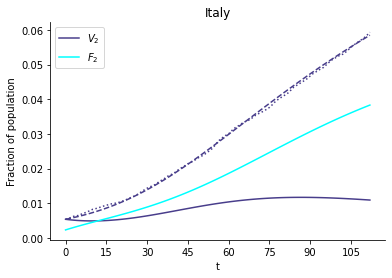

In [ ]:
import matplotlib
matplotlib.use('PS')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(2,2),dpi=300)

from matplotlib.ticker import MaxNLocator

fig,ax = plt.subplots()

ax.plot(V2,color='darkslateblue')
ax.plot(F2,color='aqua')

ax.legend([r'$V_2$',r'$F_2$'])

ax.plot(V2C,color='darkslateblue',linestyle='--')
ax.plot(V2D,color='darkslateblue',linestyle=':')

#ax.plot(F2C,color='slateblue',linestyle='--')
#ax.plot(F2D,color='slateblue',linestyle=':')

ax.set_title(pais)
##ax.spines['left'].set_position(('outward',10))
##ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
#ax.xaxis.label.title = 'r'
#ax.set_ylim([0,1])
#ax.legend()
#ax.legend(framealpha=1)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
xticks = ax.xaxis.get_major_ticks()
#xticks[2].label1.set_visible(False)
#xticks[4].label1.set_visible(False)
#xticks[6].label1.set_visible(False)

ax.set_xlabel('t')
ax.set_ylabel('Fraction of population')

plt.savefig(pais + '-2.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


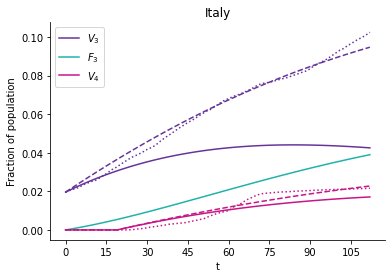

In [ ]:
fig,ax = plt.subplots()


ax.plot(V3,color='rebeccapurple')
ax.plot(F3,color='lightseagreen')
ax.plot(V4,color='mediumvioletred')
ax.legend([r'$V_3$',r'$F_3$',r'$V_4$'])



ax.plot(V3C,color='rebeccapurple',linestyle='--')
ax.plot(V3D,color='rebeccapurple',linestyle=':')
#ax.plot(F3D,color='lightseagreen',linestyle=':')
#ax.plot(F3C,color='mediumpurple',linestyle='--')


ax.plot(V4C,color='mediumvioletred',linestyle='--')
ax.plot(V4D,color='mediumvioletred',linestyle=':')


ax.set_title(pais)
##ax.spines['left'].set_position(('outward',10))
##ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
#ax.xaxis.label.title = 'r'
#ax.set_ylim([0,1])
#ax.legend()
#ax.legend(framealpha=1)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#ax.xaxis.label.title = 't'
#ax.yaxis.label.title = 'Fraction of population'

ax.set_xlabel('t')
ax.set_ylabel('Fraction of population')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
xticks = ax.xaxis.get_major_ticks()

plt.savefig(pais + '-3.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


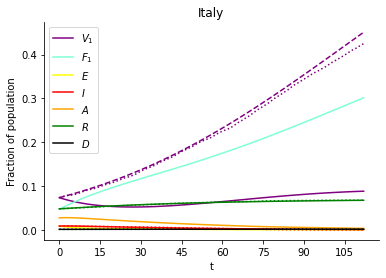

In [ ]:
fig,ax = plt.subplots()

ax.plot(V1,color='purple')
ax.plot(F1,color='aquamarine')
ax.plot(E,color='yellow')
ax.plot(I,color='red')
ax.plot(A,color='orange')
ax.plot(RC,color='green')
ax.plot(D,color='black')
ax.legend([r'$V_1$',r'$F_1$',r'$E$',r'$I$',r'$A$',r'$R$',r'$D$'])
#ax.legend([r'$E$',r'$I$',r'$A$',r'$R$',r'$D$'])
ax.plot(V1C,color='purple',linestyle='--')
ax.plot(V1D,color='purple',linestyle=':')
ax.plot(F1D,color='aquamarine',linestyle=':')
#ax.plot(F1C,color='mediumblue',linestyle='--')


ax.plot(ID,color='red',linestyle=':')
ax.plot(RD,color='green',linestyle=':')
ax.plot(DD,color='black',linestyle=':')
#plt.legend(['E','I','A','R','D'])


ax.set_title(pais)
##ax.spines['left'].set_position(('outward',10))
##ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
#ax.xaxis.label.set_title = 't'
#ax.yaxis.label.set_title = 'Fraction of population'
#ax.set_ylim([0,1])
#ax.legend()
#ax.legend(framealpha=1)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
xticks = ax.xaxis.get_major_ticks()
#xticks[2].label1.set_visible(False)
#xticks[4].label1.set_visible(False)
#xticks[6].label1.set_visible(False)
#plt.axes.xaxis.title = 't'
ax.set_xlabel('t')
ax.set_ylabel('Fraction of population')
plt.savefig(pais + '-1.eps')
plt.show()

In [ ]:
# Parametros recuperados

pais = 'Germany'

beta1 = 0.4021
beta2 = 0.1724
gamma = 0.07457
delta = 9.2951e-4
w = 0.06
rr_10 = 8.097e-3
rr_11 = 0.031869
rr_20 = 1.243e-3
rr_21 = 0.02795
rr_30 = 1.633e-3
rr_31 = 2.77e-3
rr_40 = 1e-4
rr_41 = 0.02513
theta_rr = 21
l_10 = 9.757e-3
l_11 = 0.03079
l_20 = 0.01355
l_21 = 9.9617e-3
l_30 = 9.9617e-3
l_31 = 0.0241


In [ ]:
# Parametros recuperados

pais = 'Czechia'

beta1 = 0.1938
beta2 = 0.0113
gamma = 0.0691
delta = 0.0001
w = 0.2785
rr_10 = 0.0024
rr_11 = 0.032
rr_20 = 0.0003
rr_21 = 0.03
rr_30 = 0.0004
rr_31 = 0.03
rr_40 = 0.0002
rr_41 = 0.01
theta_rr = 35
l_10 = 0.0352
l_11 = -0.0165
l_20 = 0.0432
l_21 = -0.0246
l_30 = 0.0334
l_31 = -0.0231

In [ ]:
# Parametros recuperados

pais = 'Romania'

beta1 = 0.3239
beta2 = 0.0997
gamma = 0.0727
delta = 0.002844
w = 0.0858
rr_10 = 0.004302
rr_11 = 0.001449
rr_20 = 0.0004978
rr_21 = -0.001023
rr_30 = 0.0004606
rr_31 = -0.0001145
rr_40 = 0.0003
rr_41 = 0.01
theta_rr = 38
l_10 = 0.04051147
l_11 = -0.0185036
l_20 = 0.0587374
l_21 = -0.028185
l_30 = 0.04233
l_31 = -0.02457485

In [ ]:
pais = 'Italy'

beta1 = 0.18992846
beta2 = 0.04114699
gamma = 0.037403
delta = 0.00062624
w = 0.12611503
rr_10 = 0.00292
rr_11 = 0.031864
rr_20 = 0.0005347
rr_21 = -0.02798815069
rr_30 = 0.000889592
rr_31 = 0.028997536
rr_40 = 0.000109493
rr_41 = 0.000109493
theta_rr = 21
l_10 = 0.010155
l_11 = 0.00481388
l_20 = 0.0230302
l_21 = -0.00572056
l_30 = 0.0190171
l_31 = -0.011434

In [ ]:
pais = 'Lithuania'

beta11 = 0.2672
beta2 = 0.2218
gamma = 0.05156
delta = 0.000516
w = 0.0435
rr_10 = 0.010073
rr_11 = 0.030257
rr_20 = 0.001554
rr_21 = 0.027973
rr_30 = 0.00237
rr_31 = 0.028955
rr_40 = 0.001864
rr_41 = 0.009991
#theta_rr = 21
l_10 = 0.005358
l_11 = 0.039366
l_20 = 0.006946
l_21 = 0.032233
l_30 = 0.0042
l_31 = 0.042399

In [ ]:
# Cota inferior
e1L1 = 1 - 0.684
e1L2 = 1 - 0.932

e2L2 = 1 - 0.968 # problema

e3L1 = 1 - 0.578
e3L2 = 1 - 0.82

e4L1 = 1 - 0.718

In [ ]:
# Normal

# Pfizer
alpha1 = 1/180
e1L1 = 1-0.52
e1L2 = 1-0.95
e1A = 3.77e-4

# Moderna
alpha2 = 1/180
e2L1 = 1-0.8
e2L2 = 1-0.941
e2A = 7.23e-4

# AstraZeneca

alpha3 = 1/180
e3L1 = 1-0.463
e3L2 = 1-0.76
e3A = 0.00268

# Johnson&Johnson

alpha4 = 1/180
e4L1 = 1-0.663
e4A = 0.0091

In [ ]:
print(beta11,beta12,beta21,beta22)

0.0015521779502403012 0.03026650810189467 0.00726209 0.0393353


In [ ]:
# Cota superior

e1L1 = 1 - 0.295
e1L2 = 1 - 0.89

e2L2 = 1 - 0.893

e3L1 = 1 - 0.318
e3L2 = 1 - 0.68

e4L1 = 1 - 0.599

In [ ]:
print(t)
t = 112

312.0


In [ ]:
# Parámetros potenciados
beta1 = beta1*2
beta2 = beta2*2

In [ ]:
# Parámetros regulados
beta1 = X[0]
beta2 = X[1]

In [ ]:
print(rr(rr_40,rr_41,rr_42,t))
print(beta1,beta2)
t = 66

0.00047346514592802575
0.02582713845197969 0.173495252888399


In [ ]:
# R0
l4 = 1/180 
alpha4 = 1#1 / 180 # 1
e4L2 = 0

if fino:
  beta1 = 3*beta21 + 0
  beta2 = 3*beta22 + 0

S0 = 1 + (1+ l_1/ alpha1 )*(1-e1A)*(rr(rr_10,rr_11,rr_12,t) / l_1) + (1+ l_2 / alpha2 )*(1-e2A)*(rr(rr_20,rr_21,rr_22,t) / l_2)

if pais == 'Lithuania':
  #S0 += (1+ l(l_30,l_31,t) / alpha3 )*(1-e3A)*(rr(rr_30,rr_31,t) / l(l_30,l_31,t)) + (1+ l4 / alpha4 )*(1-e4A)*(rr(rr_40,rr_41,t) / l4)
  S0 += (1+ l_3 / alpha3 )*(1-e3A)*(rr(rr_30,rr_31,rr_32,t) / l_3) + (1+ l4 / alpha4 )*(1-e4A)*(rr(rr_40,rr_41,rr_42,t) / l4)
else:
  S0 += (1+ l_3 / alpha3 )*(1-e3A)*(rr(rr_30,rr_31,rr_32,t) / l_3) + (1+ l4 / alpha4 )*(1-e4A)*(rr2(rr_40,rr_41,theta_rr,t) / l4)
S0 = 1 / S0

V10 = (1-e1A)*rr(rr_10,rr_11,rr_12,t)* S0 / l_1
V20 = (1-e2A)*rr(rr_20,rr_21,rr_22,t)* S0 / l_2
V30 = (1-e3A)*rr(rr_30,rr_31,rr_32,t)* S0 / l_3
if pais == 'Lithuania': #or pais == 'Germany':
  #V40 = (1-e4A)*rr(rr_40,rr_41,t)* S0 / l4
  V40 = (1-e4A)*rr(rr_40,rr_41,rr_42,t)* S0 / l4
else: 
  V40 = (1-e4A)*rr2(rr_40,rr_41,theta_rr,t)* S0 / l4

F10 = l_1* V10 / alpha1
F20 = l_2* V20 / alpha2
F30 = l_3* V30 / alpha3
F40 = l4* V40 / alpha4

R0 = w*beta1 / (gamma + delta) + (1-w)*beta2 / gamma

print('R0=',R0)

suma = e1L1*V10 + e1L2*F10 + e2L1*V20 + e2L2*F20 + e3L1*V30 + e3L2*F30 + e4L1*V40 + e4L2*F40  

Rc = R0*(S0 + suma)

print('Rc=',Rc)

R0= 2.4662868065670676
Rc= 1.677342367540673


In [ ]:
print(beta11,beta12,beta21,beta22)
#beta11,beta12,beta21,beta22 = 0.060.0087032,0.017218092301319793,0.11566350192559934

0.06 0.022334 0.017218092301319793 0.11566350192559934


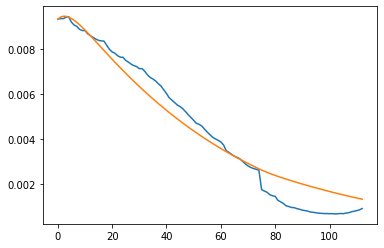

In [ ]:
plt.plot(ID)
plt.plot(I)
plt.show()

In [ ]:
#IA = I[0:len(ID)]
IB = I + []

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


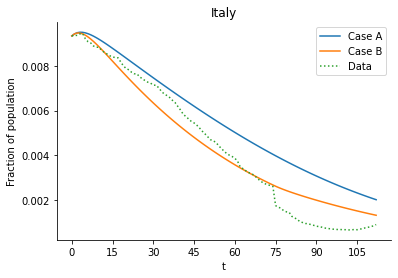

In [ ]:
fig,ax = plt.subplots()

#fig = plt.figure(figsize=(9,11))

ax.plot(IA)
ax.plot(IB)
ax.plot(ID,linestyle=':')
ax.legend([r'Case A',r'Case B',r'Data'])

ax.set_title(pais)
##ax.spines['left'].set_position(('outward',10))
##ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
#ax.xaxis.label.set_title = 't'
#ax.yaxis.label.set_title = 'Fraction of population'
#ax.set_ylim([0,1])
#ax.legend()
#ax.legend(framealpha=1)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
xticks = ax.xaxis.get_major_ticks()
#xticks[2].label1.set_visible(False)
#xticks[4].label1.set_visible(False)
#xticks[6].label1.set_visible(False)
#plt.axes.xaxis.title = 't'
ax.set_xlabel('t')
ax.set_ylabel('Fraction of population')
plt.savefig(pais + '-6.eps',bbox_inches='tight')
plt.show()

In [ ]:
C = []

for t in range(1,len(TD) + 1000):

  if t == 120:
    beta1 = beta1*3
    beta2 = beta2*3

    prop = 0.5

    # Pfizer
    e1L1 = 1-0.52*prop
    e1L2 = 1-0.95*prop

    # Moderna
    e2L1 = 1-0.8*prop
    e2L2 = 1-0.941*prop

    # AstraZeneca
    e3L1 = 1-0.463*prop
    e3L2 = 1-0.76*prop

    # Johnson&Johnson
    e4L1 = 1-0.663*prop

  S0 = 1 + (1+ l_1/ alpha1 )*(1-e1A)*(rr(rr_10,rr_11,rr_12,t) / l_1) + (1+ l_2 / alpha2 )*(1-e2A)*(rr(rr_20,rr_21,rr_22,t) / l_2)

  if pais == 'Lithuania':
    S0 += (1+ l(l_30,l_31,t) / alpha3 )*(1-e3A)*(rr(rr_30,rr_31,t) / l(l_30,l_31,t)) + (1+ l4 / alpha4 )*(1-e4A)*(rr(rr_40,rr_41,t) / l4)
  else:
    S0 += (1+ l_3 / alpha3 )*(1-e3A)*(rr(rr_30,rr_31,rr_32,t) / l_3) + (1+ l4 / alpha4 )*(1-e4A)*(rr2(rr_40,rr_41,theta_rr,t) / l4)
  S0 = 1 / S0

  V10 = (1-e1A)*rr(rr_10,rr_11,rr_12,t)* S0 / l_1
  V20 = (1-e2A)*rr(rr_20,rr_21,rr_22,t)* S0 / l_2
  V30 = (1-e3A)*rr(rr_30,rr_31,rr_32,t)* S0 / l_3
  if pais == 'Lithuania': #or pais == 'Germany':
    V40 = (1-e4A)*rr(rr_40,rr_41,t)* S0 / l4
  else: 
    V40 = (1-e4A)*rr2(rr_40,rr_41,theta_rr,t)* S0 / l4

  F10 = l_1* V10 / alpha1
  F20 = l_2* V20 / alpha2
  F30 = l_3* V30 / alpha3
  F40 = l4* V40 / alpha4

  R0 = w*beta1 / (gamma + delta) + (1-w)*beta2 / gamma

  #print('R0=',R0)

  suma = e1L1*V10 + e1L2*F10 + e2L1*V20 + e2L2*F20 + e3L1*V30 + e3L2*F30 + e4L1*V40 + e4L2*F40  

  Rc = R0*(S0 + suma)

  C.append(Rc)

In [ ]:
C3 = C + []

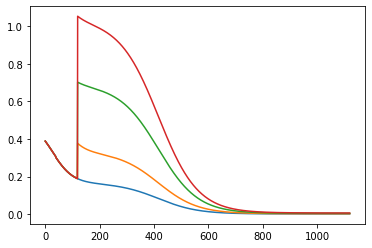

In [ ]:
#plt.plot(C0s)
plt.plot(C0)
plt.plot(C1)
plt.plot(C2)
plt.plot(C3)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


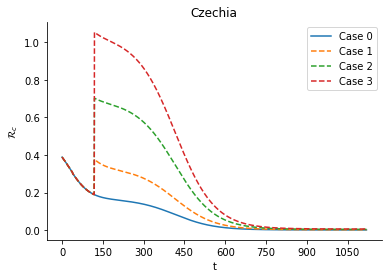

In [ ]:
fig,ax = plt.subplots()

#fig = plt.figure(figsize=(9,11))

ax.plot(C0)
ax.plot(C1,linestyle='--')
ax.plot(C2,linestyle='--')
ax.plot(C3,linestyle='--')
ax.legend([r'Case 0',r'Case 1',r'Case 2',r'Case 3'])


ax.set_title(pais)
##ax.spines['left'].set_position(('outward',10))
##ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
#ax.xaxis.label.set_title = 't'
#ax.yaxis.label.set_title = 'Fraction of population'
#ax.set_ylim([0,1])
#ax.legend()
#ax.legend(framealpha=1)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
xticks = ax.xaxis.get_major_ticks()
#xticks[2].label1.set_visible(False)
#xticks[4].label1.set_visible(False)
#xticks[6].label1.set_visible(False)
#plt.axes.xaxis.title = 't'
ax.set_xlabel('t')
ax.set_ylabel(r'$\mathcal{R}_c$')
plt.savefig(pais + '-5.eps',bbox_inches='tight')
plt.show()

In [ ]:
rr_1 = rr(rr_10,rr_11,rr_12,t) 
rr_2 = rr(rr_20,rr_21,rr_22,t)
rr_3 = rr(rr_30,rr_31,rr_32,t)
rr_4 = rr(rr_40,rr_41,rr_42,t)

eps1 = e1L1 + e1L2*l_1 / alpha1
eps2 = e2L1 + e2L2*l_2 / alpha2
eps3 = e3L1 + e3L2*l_3 / alpha3
eps4 = e4L1 + e4L2*l4 / alpha4

B_1 = (1 + l_1 / alpha1)*(1-e1A)/ l_1
B_2 = (1 + l_2 / alpha2)*(1-e2A)/ l_2
B_3 = (1 + l_3 / alpha3)*(1-e3A)/ l_3
B_4 = (1 + l4 / alpha4)*(1-e4A)/ l4


if pais == 'Lithuania':
  eta1 = 1 + eps1*(1-e1A)*rr_1 / l_1 + eps2*(1-e2A)*rr_2 / l_2  + eps3*(1-e3A)*rr_3 / l_3 + eps4*(1-e4A)*rr_4 / l4
  eta2 = 1 + B_1*rr_1 + B_2*rr_2 + B_3*rr_3 + B_4*rr_4
else:
  eta1 = 1 + eps1*(1-e1A)*rr_1 / l_1 + eps2*(1-e2A)*rr_2 / l_2  + eps3*(1-e3A)*rr_3 / l_3 + eps4*(1-e4A)*rr2(rr_40,rr_41,theta_rr,t) / l4
  eta2 = 1 + B_1*rr_1 + B_2*rr_2 + B_3*rr_3 + B_4*rr2(rr_40,rr_41,theta_rr,t)

eta = eta1/eta2

print(eps1 / (1 + l_1 / alpha1))
print(eps2 / (1 + l_2 / alpha2))
print(eps3 / (1 + l_3 / alpha3))
print(eps4 / (1 + l4 / alpha4) )
print('eta=',eta)

0.5474626865671642
0.5368656716417911
0.66725
0.6648066298342541
eta= 0.6747118788453867


In [ ]:
if pais == 'Lithuania':
  eta1 = 1 + eps2*(1-e2A)*rr_2 / l_2  + eps3*(1-e3A)*rr_3 / l_3 + eps4*(1-e4A)*rr_4 / l4
  eta2 = 1 + B_2*rr_2 + B_3*rr_3 + B_4*rr_4
else:
  eta1 = 1 + eps2*(1-e2A)*rr_2 / l_2  + eps3*(1-e3A)*rr_3 / l_3 + eps4*(1-e4A)*rr2(rr_40,rr_41,theta_rr,t) / l4
  eta2 = 1 + B_2*rr_2 + B_3*rr_3 + B_4*rr_4 #B_4*rr2(rr_40,rr_41,theta_rr,t)


eta = eta1/eta2

print('eta1=',eta)

eta1= 0.7620238637761378


In [ ]:
if pais == 'Lithuania':
  eta1 = 1 + eps1*(1-e1A)*rr_1 / l_1+  + eps3*(1-e3A)*rr_3 / l_3 + eps4*(1-e4A)*rr_4 / l4
  eta2 = 1 + B_1*rr_1  + B_3*rr_3 + B_4*rr_4
else:
  eta1 = 1 + eps1*(1-e1A)*rr_1 / l_1 + eps3*(1-e3A)*rr_3 / l_3 + eps4*(1-e4A)*rr2(rr_40,rr_41,theta_rr,t) / l4
  eta2 = 1 + B_1*rr_1  + B_3*rr_3 + B_4*rr_4  #B_4*rr2(rr_40,rr_41,theta_rr,t)


eta = eta1/eta2

print('eta2=',eta)

eta2= 0.3879644444040594


In [ ]:
if pais == 'Lithuania':
  eta1 = 1 + eps1*(1-e1A)*rr_1 / l_1 + eps2*(1-e2A)*rr_2 / l_2  + eps4*(1-e4A)*rr_4 / l4
  eta2 = 1 + B_1*rr_1 + B_2*rr_2 + B_4*rr_4
else:
  eta1 = 1 + eps1*(1-e1A)*rr_1 / l_1 + eps2*(1-e2A)*rr_2/ l_2 + eps4*(1-e4A)*rr2(rr_40,rr_41,theta_rr,t) / l4
  eta2 = 1 + B_1*rr_1 + B_2*rr_2 +  B_4*rr_4 #B_4*rr2(rr_40,rr_41,theta_rr,t)


eta = eta1/eta2

print('eta3=',eta) 

eta3= 0.37091487009950413


In [ ]:
eta1 = 1 + eps1*(1-e1A)*rr_1 / l_1 + eps2*(1-e2A)*rr_2 / l_2 + eps3*(1-e3A)*rr_3 / l_3
eta2 = 1 + B_1*rr_1 + B_2*rr_2 + B_3*rr_3

eta = eta1/eta2

print('eta4=',eta)

eta4= 0.3608358396455006


In [ ]:
Gamma_beta1 = w*beta1/(R0*(gamma+ delta))
print(Gamma_beta1)

0.05710899384794588


In [ ]:
Gamma_beta2 = (1-w)*beta2 /(R0*gamma)
print(Gamma_beta2)

0.942891006152054


In [ ]:
Gamma_gamma = -w*gamma*beta1/(R0*(gamma+delta)**2) - (1-w)*beta2/(gamma*R0)
print(Gamma_gamma)

-0.9990979063639436


In [ ]:
Gamma_delta = - w*beta1*delta/(R0*(gamma+delta)**2)
print(Gamma_delta)

-0.0009020936360563745


In [ ]:
Gamma_w = w*beta1/((gamma+delta)*R0) - w*beta2/(gamma*R0)
print(Gamma_w)

-0.2571880082027388


In [ ]:
v = Rc / (R0*S0)

suma1 = 1 + B_1*rr_1 + B_2*rr_2 + B_3*rr_3 + B_4*rr_4#rr2(rr_40,rr_41,theta_rr,t)

Gamma_alpha1 = (1/(v*R0))*(-e1L2*(1-e1A)*rr_1*S0/alpha1 + v*(1-e1A*rr_1)/suma1**2)
print(Gamma_alpha1)

0.06947937441862716


In [ ]:
Gamma_r1 = (rr_1 / (v*S0))*(S0*eps1*(1-e1A)/l_1 - v*B_1/(suma1)**2 )
print(Gamma_r1)
D_r1 = (S0*eps1*(1-e1A)/l_1 - v*B_1/(suma1)**2 )
print(R0*D_r1)

-0.45112972271983837
-12.585948987361338


In [ ]:
Gamma_r2 = (rr_2 / (v*S0))*(S0*eps2*(1-e2A)/l_2 - v*B_2/(suma1)**2 )
print(Gamma_r2)
D_r2 = (S0*eps2*(1-e2A)/l_2 - v*B_2/(suma1)**2 )
print(R0*D_r2)

-0.05147798444197792
-13.528892641320883


In [ ]:
Gamma_r3 = (rr_3 / (v*S0))*(S0*eps3*(1-e3A)/l_3 - v*B_3/(suma1)**2 )
print(Gamma_r3)
D_r3 = S0*eps3*(1-e3A)/l_3 - v*B_3/(suma1)**2 
print(R0*D_r3)

-0.008226956246925697
-2.455809608660353


In [ ]:
Gamma_r4 = (rr2(rr_40,rr_41,theta_rr,t) / (v*S0))*(S0*eps4*(1-e4A)/l_4 - v*B_4/(suma1)**2 )
print(Gamma_r4)
D_r4 = S0*eps4*(1-e4A)/l_4 - v*B_4/(suma1)**2
print(R0*D_r4)

-0.020609627867491494
-14.949039666574512


In [ ]:
print(S0)
print(rr_40,rr_41)

0.2706884703080005
0.00041173299245796764 -7.278848564993603e-05


In [ ]:
ban1 = True
ban2 = True

if fino:
  beta1 = beta11 + 0
  beta2 = beta12 + 0

if True:
  m = 1
  h1 = 1 / m

  v1 = V1D[0] 
  v1c = V1D[0]
  f1 = f10
  #f1c = F1D[0]
  v2 = V2D[0] 
  v2c = V2D[0]
  f2 = f20
  #f2c = F2D[0]
  v3 = V3D[0] 
  v3c = V3D[0]
  f3 = f30#F3D[0]
  #f3c = F3D[0]
  v4 = V4D[0]
  v4c = V4D[0]
  #s = SD[0]
  e = E0
  i = ID[0]
  a = (1-w)*ID[0] / w
  r = RD[0]
  rc = RD[0]  
  d = DD[0]
  s = SD[0]#1 - v1 - f1 - v2 - f2 - v3 - f3 - v4 - e - i - a - r - d 

  #print(s)

  V1 = [v1]
  V1C = [v1c]
  F1 = [f1]
  #F1C = [f1c]
  V2 = [v2]
  V2C = [v2c]
  F2 = [f2]
  #F2C = [f2c]
  V3 = [v3]
  V3C = [v3c]
  F3 = [f3]
  #F3C = [f3c]
  V4 = [v4]
  V4C = [v4c]


  S = [s]
  E = [e]
  I = [i]
  A = [a]
  R = [r]
  RC= [r]
  D = [d]

  PR = [rr_10,rr_11,rr_12,rr_20,rr_21,rr_22,rr_30,rr_31,rr_32,rr_40,rr_41,theta_rr4]
  PL = [l_1,l_2,l_3]



  for tempo in range(1,len(TD) + 400): #10000

    t = tempo / m

    if fino and t == umbral:
      beta1 = beta21 + 0
      beta2 = beta22 + 0

    if t == len(TD):
      pot = 3
      beta1 = beta1*pot
      beta2 = beta2*pot

      prop = 0.5

      # Pfizer
      e1L1 = 1-0.52*prop
      e1L2 = 1-0.95*prop

      # Moderna
      e2L1 = 1-0.8*prop
      e2L2 = 1-0.941*prop

      # AstraZeneca
      e3L1 = 1-0.463*prop
      e3L2 = 1-0.76*prop

      # Johnson&Johnson
      e4L1 = 1-0.663*prop

    d1 = fV1(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d2 = fF1(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d3 = fV2(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d4 = fF2(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d5 = fV3(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d6 = fF3(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d7 = fV4(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d8 = fS(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d9 = fE(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d10= fI(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d11= fA(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d12 = fR(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    d13 = delta*i

    #print(d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13)
    #print(d1+d2+d3+d4+d5+d6+d7+d8+d9+d10+d11+d12+d13)

    v11 = v1 + h1*fV1(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v1c1= v1c + h1*rr(rr_10,rr_11,rr_12,t)*s
    f11 = f1 + h1*fF1(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    #f1c1= f1c + l(l_10,l_11,t)*(v1c1-f1c)#v
    v21 = v2 + h1*fV2(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v2c1= v2c + h1*rr(rr_20,rr_21,rr_22,t)*s
    f21 = f2 + h1*fF2(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    #f2c1= f2c + l(l_20,l_21,t)*(v2c1-f2c)#v
    v31 = v3 + h1*fV3(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    v3c1= v3c + h1*rr(rr_30,rr_31,rr_32,t)*s
    f31 = f3 + h1*fF3(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    #f3c1= f3c + l(l_30,l_31,t)*(v3c1-f3c)#v
    v41 = v4 + h1*fV4(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    if pais == 'Lithuania':
      v4c1= v4c + h1*rr(rr_40,rr_41,rr_42,t)*s
    else:  
      v4c1= v4c + h1*rr2(rr_40,rr_41,theta_rr,t)*s
    s1 = s + h1*fS(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    e1 = e + h1*fE(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    i1 = i + h1*fI(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    a1 = a + h1*fA(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    r11 = r + h1*fR(v1,f1,v2,f2,v3,f3,v4,s,e,i,a,r,beta1,beta2,gamma,PR,PL,t)
    rc1= rc + h1*gamma*i
    d1 = d + h1*delta*i

    v1 = v11 + 0
    v1c = v1c1 + 0
    #f1c = f1c1 + 0
    f1 = f11 + 0
    v2 = v21 + 0
    v2c = v2c1 + 0  
    f2 = f21 + 0
    #f2c = f2c1 + 0
    v3 = v31 + 0
    v3c = v3c1 + 0
    #f3c = f3c1 + 0
    f3 = f31 + 0  
    v4 = v41 + 0
    v4c = v4c1 + 0
    s = s1 + 0
    e = e1 + 0
    i = i1 + 0
    a = a1 + 0
    r = r11 + 0
    rc = rc1 + 0
    d = d1 + 0

    if ban1 and i < 1/N:
      print(t)
      ban1 = False

    V1.append(v1)
    V1C.append(v1c)
    F1.append(f1)
    #F1C.append(f1c)
    V2.append(v2)
    V2C.append(v2c)
    F2.append(f2)
    #F2C.append(f2c)
    V3.append(v3)
    V3C.append(v3c)
    F3.append(f3)
    #F3C.append(f3c)
    V4.append(v4)
    V4C.append(v4c)
    S.append(s)
    E.append(e)
    I.append(i)
    A.append(a)#w2*i) # !
    R.append(r)
    RC.append(rc)
    D.append(d)  

In [ ]:
print(S0)
print(t)
t = len(TD)-1#int(t)
print(t)
print(V1D[t]+ V2D[t] + V3D[t] + V4D[t])
print(V1D[t]+ V2D[t] + V3D[t])
print(V1[t]+ V2[t] + V3[t] + V4[t] + F1[t] + F2[t] + F3[t])

0.2706884703080005
112
112
0.6082795281212635
0.5866908269946897
0.5380092584589781


In [ ]:
I0 = I + []

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


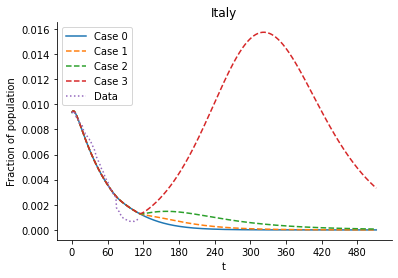

In [ ]:
fig,ax = plt.subplots()

#fig = plt.figure(figsize=(9,11))

ax.plot(I0)
ax.plot(I1,linestyle='--')
ax.plot(I2,linestyle='--')
ax.plot(I3,linestyle='--')
#ax.plot(I4,linestyle='--')
ax.plot(ID,linestyle=':')
ax.legend([r'Case 0',r'Case 1',r'Case 2',r'Case 3',r'Data'])


ax.set_title(pais)
##ax.spines['left'].set_position(('outward',10))
##ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
#ax.xaxis.label.set_title = 't'
#ax.yaxis.label.set_title = 'Fraction of population'
#ax.set_ylim([0,1])
#ax.legend()
#ax.legend(framealpha=1)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
xticks = ax.xaxis.get_major_ticks()
#xticks[2].label1.set_visible(False)
#xticks[4].label1.set_visible(False)
#xticks[6].label1.set_visible(False)
#plt.axes.xaxis.title = 't'
ax.set_xlabel('t')
ax.set_ylabel('Fraction of population')
plt.savefig(pais + '-4-2.eps',bbox_inches='tight')
plt.show()

In [ ]:
print(R0*(e2L1 + l_1*e2L2/alpha2)/(1+l_2/alpha2)) 

1.3240647228689169
